In [2]:
import os
os.environ['TRANSFORMERS_CACHE'] = "B:/cache/"

In [3]:
import transformers
from transformers import pipeline,ZeroShotClassificationPipeline
import torch
import numpy as np
import scipy as sp
import pandas as pd
import shap
import re

from typing import Union, List

# Sentiment analysis

In [19]:
classifier = pipeline('sentiment-analysis')
explainer = shap.Explainer(classifier)
 
value = explainer(['I need my fucking money back I dont need this shit it doesnt work'])
shap.plots.text(value)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


  0%|          | 0/306 [00:00<?, ?it/s]

In [15]:
text = 'the girl is hot as fuck!'
classifier = pipeline('sentiment-analysis')
classifier(text)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9727274775505066}]

In [16]:
explainer = shap.Explainer(classifier)
value = explainer([text])
value

.values =
array([[[ 0.        ,  0.        ],
        [-0.06114995,  0.02884254],
        [-0.04783314,  0.0577625 ],
        [ 0.06064096,  0.02407453],
        [-0.60360919,  0.64442645],
        [-0.13772381,  0.17172383],
        [ 0.24972317, -0.17461738],
        [-0.18360747,  0.22051501],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.72355944, 0.        ]])

.data =
(array(['', 'the ', 'girl ', 'is ', 'hot ', 'as ', 'fuck', '!', ''],
      dtype=object),)

In [17]:
shap.plots.text(value)

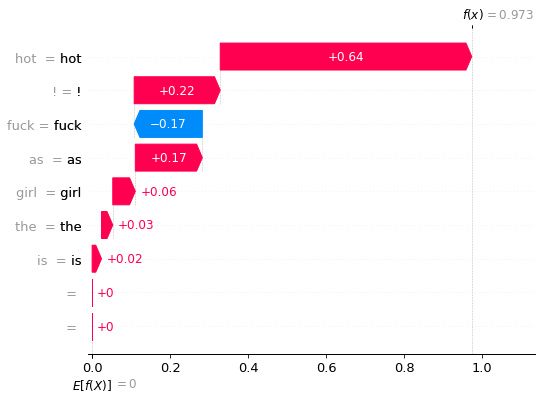

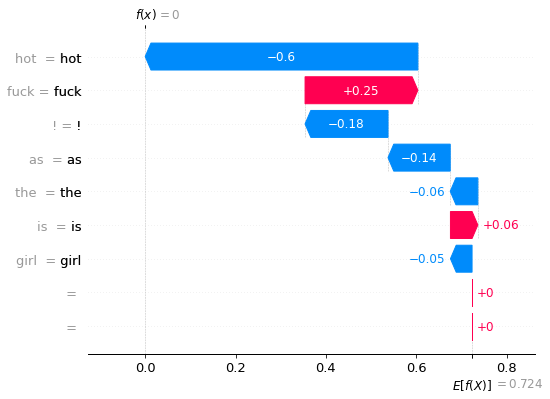

In [18]:
shap.plots.waterfall(value[0,:,'POSITIVE'])
shap.plots.waterfall(value[0,:,'NEGATIVE'])

In [12]:
# transformer 情感分析一样不能识别 slang
explainer = shap.Explainer(classifier)
value = explainer(['the movie is so fucking sick!'])
shap.plots.text(value)

In [13]:
# Bias example 
explainer = shap.Explainer(classifier)
value = explainer(['he is Afghans','he is Chinese','he is American'])
shap.plots.text(value)

# Text classification

In [17]:
# text-classification & sentiment analysis default model 是一样的 
classifier = transformers.pipeline("text-classification", return_all_scores=True)
classifier(['this movie is fucking awesome'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[[{'label': 'NEGATIVE', 'score': 0.00014378347259480506},
  {'label': 'POSITIVE', 'score': 0.9998562335968018}]]

In [6]:
# 'distilbert-base-uncased'是最基础的 distill bert 都还没有 fine tuning 过。 可以用这个model 来fine tuning 加上自己的label. label0 和 label1的概率都是 差不多的。 就可以判断出这个model 还没有 fine tuning 随便写任何一句话的概率在每一个class、里面
# 都是差不多的 
classifier = transformers.pipeline("text-classification", return_all_scores=True, model='distilbert-base-uncased')
classifier(['haha he is Afghans'])

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

[[{'label': 'LABEL_0', 'score': 0.44344639778137207},
  {'label': 'LABEL_1', 'score': 0.5565536022186279}]]

In [21]:
# 这个列子是bhadresh-savani这个人 用了bert base 参数比 distill 更多， 做了一个emotion 分类
classifier = transformers.pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=True)

explainer = shap.Explainer(classifier)
shap_values = explainer(['I ordered the tool and it takes forever to get here!',
                         'my mom ordered this kick-ass bike from your shop and I love it so much'])
shap.plots.text(shap_values)

  0%|          | 0/182 [00:00<?, ?it/s]

Partition explainer:  50%|███████████████████████████████████▌                                   | 1/2 [00:00<?, ?it/s]

  0%|          | 0/342 [00:00<?, ?it/s]

Partition explainer: 3it [00:31, 15.86s/it]                                                                            


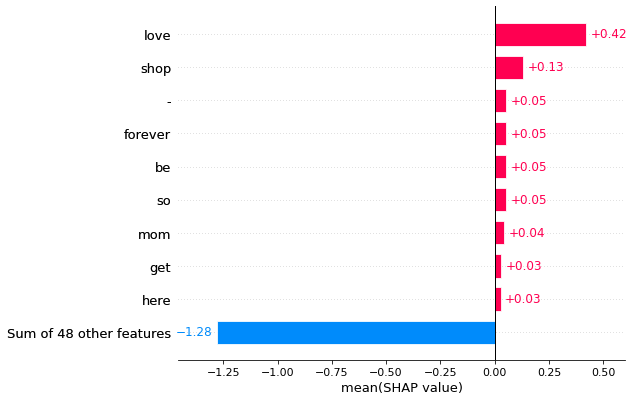

In [25]:
# Plotting the top words impacting a specific class
# 可以看到属于 joy的 最高是love 
shap.plots.bar(shap_values[:,:,"joy"].mean(0), order=shap.Explanation.argsort.flip)

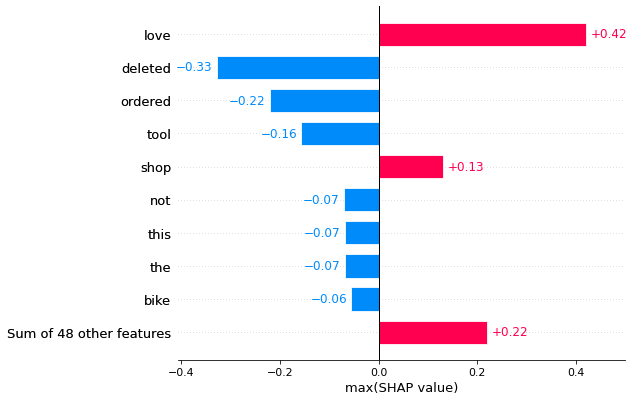

In [24]:
shap.plots.bar(shap_values[:,:,"joy"].max(0))

In [ ]:
shap_values[:,:,"joy"]

.values =
array([array([ 0.        , -0.00578496, -0.38662462, -0.06782868, -0.15639046,
              -0.05666379, -0.0220156 , -0.01448894,  0.05359228, -0.00054385,
               0.02998446,  0.02653344, -0.00313615,  0.        ])            ,
       array([ 0.        , -0.0202471 ,  0.04373928, -0.22037474, -0.0680554 ,
               0.02070124,  0.05382134, -0.00964019, -0.05509702, -0.00308048,
              -0.03981683,  0.13131201,  0.0047738 ,  0.02435922,  0.41997912,
               0.00271486,  0.05150981, -0.04895113,  0.        ])            ,
       array([-0.00322437, -0.00322437, -0.00442691, -0.00453088,  0.00424907,
               0.00424907,  0.01276308,  0.01276308,  0.01141534, -0.0179794 ,
              -0.03963948, -0.00478832, -0.00821518, -0.01266715, -0.00858773,
              -0.01516132, -0.0070207 ,  0.0019771 ,  0.0019771 , -0.00743763,
              -0.00743763,  0.01382824,  0.00264194,  0.01785297,  0.02651359,
              -0.0091969 , -0.01676403, 

# Fine tuning text classification example custom dataset

这个列子在我的customer issues （fine tuning transformer model 里面）

# Zero-shot classificaion

https://towardsdatascience.com/explainable-machine-learning-for-models-trained-on-text-data-combining-shap-with-transformer-5095ea7f3a8

https://huggingface.co/transformers/v4.6.0/_modules/transformers/pipelines/zero_shot_classification.html

In [30]:
# 直接用pipeline 需要在这个基础上 改一下output

model = transformers.AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
tokenizer = transformers.AutoTokenizer.from_pretrained("facebook/bart-large-mnli")

classifier = transformers.pipeline("zero-shot-classification", model = model, tokenizer=tokenizer, return_all_scores=True, candidate_labels = ['restaurant','environment','service'])
classifier('their food sucks')

{'sequence': ' their food sucks',
 'labels': ['restaurant', 'service', 'environment'],
 'scores': [0.7493733167648315, 0.15340937674045563, 0.09721724689006805]}

In [31]:
# 直接用 ZeroShotClassificationPipeline
# 可以看出直接用 ZeroShotClassificationPipeline 的时候 output是又 sequence， 这样带不进shap。 这里可以回到huggling face source code看看
model = transformers.AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
tokenizer = transformers.AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
zsc = ZeroShotClassificationPipeline(model = model, tokenizer = tokenizer)
output = zsc(['their food sucks'], candidate_labels = ['good','normal','awful'])
output

[{'sequence': 'their food sucks',
  'labels': ['awful', 'normal', 'good'],
  'scores': [0.9829191565513611, 0.01039587240666151, 0.006684943102300167]}]

In [159]:
# 我们需要的是这种结构
[[{'label': n[0], 'scores': n[1] } for n in  zip (output[0]['labels'], output[0]['scores'])]]

[[{'label': 'good', 'scores': 0.985630214214325},
  {'label': 'normal', 'scores': 0.008450882509350777},
  {'label': 'awful', 'scores': 0.005918895360082388}]]

In [ ]:
# https://huggingface.co/transformers/v4.6.0/_modules/transformers/pipelines/zero_shot_classification.html

class zsc2(ZeroShotClassificationPipeline):
    def __call__(self,   sequences: Union[str, List[str]],  candidate_labels = ['good','normal','awful']):
        output = super().__call__(sequences, candidate_labels)
        output = [[{'label': n[0], 'score': n[1] } for n in  zip (output[m]['labels'],output[m]['scores'])] for m in range(len(output))]
        return output
    
model = transformers.AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
tokenizer = transformers.AutoTokenizer.from_pretrained("facebook/bart-large-mnli")

labels = ['good','normal','awful']
label2number = {v:k for k,v in enumerate(labels)}
number2label = {k:v for k,v in enumerate(labels)}

model.config.label2id.update(label2number)
model.config.id2label.update(number2label)




zsc2model = zsc2(model = model, tokenizer = tokenizer, return_all_scores=True)
# zsc2model.set_labels(labels)  

output = zsc2model(['the food is sucks here'])
#output = zsc2model(['this movie is fucking awesome','I think its good'])
output

[[{'label': 'awful', 'score': 0.9952468872070312},
  {'label': 'good', 'score': 0.0026006391271948814},
  {'label': 'normal', 'score': 0.002152414293959737}]]

In [27]:
# SHAP Explainer
explainer = shap.Explainer(zsc2model)
shap_values = explainer(['the food is sucks here'])

shap.plots.text(shap_values)

shap_values

  0%|          | 0/42 [00:00<?, ?it/s]

Partition explainer: 2it [00:21, 21.35s/it]                                                                            


.values =
array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.03133649, -0.01145855, -0.01987798],
        [ 0.05916019, -0.02597042, -0.03318977],
        [ 0.01850928, -0.01622114, -0.00228815],
        [-0.75373521, -0.15157938,  0.90531456],
        [ 0.02849068, -0.01145878, -0.01703191],
        [ 0.        ,  0.        ,  0.        ]]])

.base_values =
array([[0.6188392 , 0.21884069, 0.16232014]])

.data =
(array(['', 'the ', 'food ', 'is ', 'sucks ', 'here', ''], dtype=object),)